# Part 1

In [1]:
# imports and functions provided
%pylab inline
from PIL import Image
import os
import pandas as pd
import pylab as pl

Populating the interactive namespace from numpy and matplotlib


In [2]:
def load_images(img_dir, grayscale=False):
    """Loads images from within a specified directory.

    Args:
      img_dir (str): The directory from which to load (.jpg) images.
      grayscale (bool): Whether to convert the image into grayscale. Defaults to False.

    Returns:
      images: An array of image objects loaded from the specified directory

    """
    images = []

    for file in os.listdir(img_dir):
        if file.endswith(".jpg"):
            im = Image.open(os.path.join(img_dir, file))

            im = im.resize((100, 100))

            if grayscale:
                im = np.array(im, dtype=np.float64) / 255

                # Convert image to grayscale
                r, g, b = im[:,:,0], im[:,:,1], im[:,:,2]
                gray = 0.2989*r + 0.5870*g + 0.1140*b
                im = gray.reshape((1, -1))[0]

            images.append(im)

    return images

def plot_image_space(images, X, title="Projection of the Images into 2 Dimensions"):
    """Generates and shows a plot of images in a feature space.

    A figure with one plot is generated. The plot displays the location of each image in 
    relation to the image's feature values in the input feature space (X).

    Args:
      images (Image): An image.
      images (SciPy array): An array of SSQs, one computed for each k.

    """
    # min-max normalization    
    x_min, x_max = np.min(X, axis=0), np.max(X, axis=0)
    X = (X - x_min) / (x_max - x_min)

    # Create a figure
    pl.figure(figsize=(16, 5))
    ax = pl.subplot(111)
    #ax.axis('off')

    # Generate picture thumbnails in the plot
    if hasattr(matplotlib.offsetbox, 'AnnotationBbox'):
        # only print thumbnails with matplotlib > 1.0
        for i in range(len(images)):
            imagebox = matplotlib.offsetbox.OffsetImage(images[i], zoom=.65)
            ab = matplotlib.offsetbox.AnnotationBbox(imagebox, X[i][0:2])                                  
            ax.add_artist(ab)

    # Add figure labels and ticks
    pl.title(title, fontsize=16)
    pl.xticks([]), pl.yticks([])

    # Add figure bounds
    pl.ylim((np.min(X, axis=0)[1])-0.25,(np.max(X, axis=0)[1])+0.25)
    pl.xlim((np.min(X, axis=0)[0])-0.1,(np.max(X, axis=0)[0])+0.1)

In [3]:
img_dir = os.path.join(os.getcwd(), "images1") # directory path
images = load_images(img_dir) # load images in the specified directory

In [4]:
X = pd.DataFrame([im.histogram() for im in images])

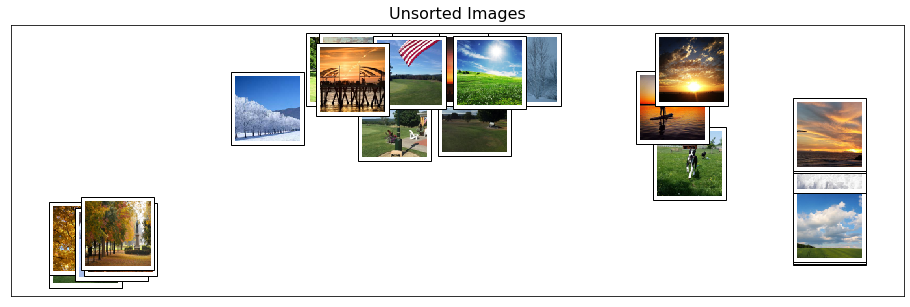

In [5]:
# assignment start - plot images to see what it looks like
plot_image_space(images, X, title="Unsorted Images")

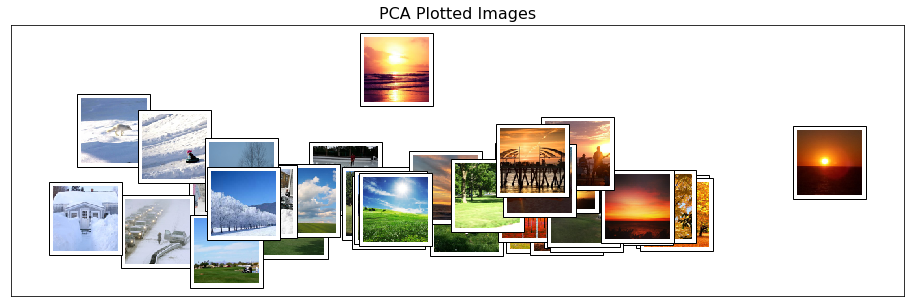

In [6]:
# import PCA
from sklearn import decomposition
# Use PCA transformation and plot results
pca_trans = decomposition.PCA(n_components=2)
X_proj = pca_trans.fit_transform(X)
plot_image_space(images, X_proj, 'PCA Plotted Images')

# Part 2

###### Given this output, What does it mean for two images to be close together in this plot? What does it mean for two images to be far apart?

Images closer together mean similar colors within the images. On the left, we have images that are all in winter together. In the middle, the images are greener and could be of any of the other seasons, as could the sunsets.

Images that are far apart represent different color schemes. This is generalized to seasons that are not the same (winter on the left and fall near the right).

# Part 3

Images for this are taken around the Seattle area and from my own collection. They have been taken in the last 9 months. They can be found here: 

In [9]:
# A repeat of the above with a picture selection of my own
img_dir2 = os.path.join(os.getcwd(), "images2") # directory path
images2 = load_images(img_dir2) # load images in the specified directory
Y = pd.DataFrame([im.histogram() for im in images2])

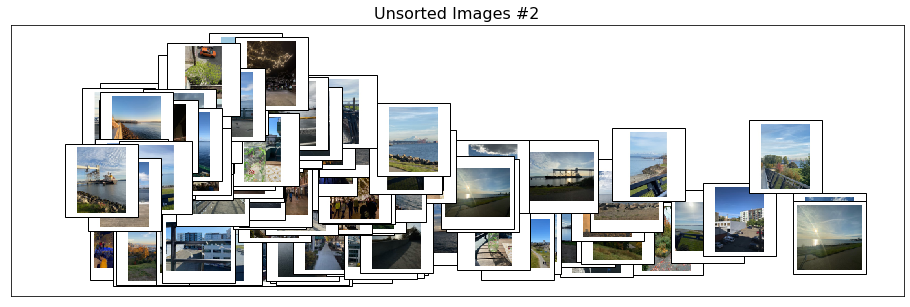

In [10]:
# images plotted unsorted
plot_image_space(images2, Y, title="Unsorted Images #2")